<a href="https://colab.research.google.com/github/Srivardini/Artificial_star/blob/main/Five_Stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [41]:
!pip install photutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import os
import sys

In [43]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.nddata import CCDData
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
 
from photutils.datasets import make_gaussian_sources_image

#Five_Stars

In [44]:
from photutils.datasets import make_random_gaussians_table, make_gaussian_sources_image

#Table:
shape = (500,500)
n_sources = 5
param_ranges = {'flux': [100, 1000],
                    'x_mean': [50, 450],
                    'y_mean': [50, 450],
                    'x_stddev': [3,3],
                    'y_stddev': [3,3],
                    'theta': [0, np.pi]} 
sources = make_random_gaussians_table(n_sources, param_ranges, seed =12345)

#make_image:

stars_image = make_gaussian_sources_image(shape, sources)

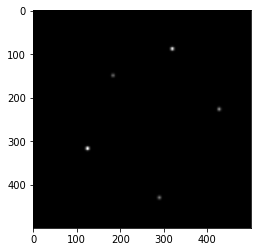

In [45]:
plt.imshow(stars_image, interpolation = 'nearest', cmap = 'gray')

#Stars_Detection

In [46]:
from photutils.detection import DAOStarFinder
from astropy.stats import sigma_clipped_stats

In [47]:
mean, median, std = sigma_clipped_stats(stars_image, sigma=3.0)  

daofind = DAOStarFinder(fwhm=9.42, threshold=5.*std)  
sources_stars = daofind(stars_image - median)  

In [48]:
sources_stars

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,319.1005319265878,88.35552525812568,0.4589147275081971,0.010716845854935346,0.009097430460255398,169,0.0,12.434576394533671,13832636.619499626,-17.852262420656974
2,183.1233049597628,149.29441941132228,0.4591782217393015,0.00985383806461007,0.005613071030960291,169,0.0,5.355299926514062,5960051.7862500055,-16.938125083236876
3,426.7249788384287,226.7396439565466,0.45885396542757634,0.015914659802203007,-0.0006137062650336373,169,0.0,7.927847324457312,8818293.091813862,-17.36346132321887
4,124.69754089860425,316.89691089806433,0.4591772858554946,0.00516667241784081,-0.006349186536524394,169,0.0,14.374864147851907,15998133.93477067,-18.010173320843712
5,289.3196626593726,429.55475605595046,0.45765994327475157,-0.02928596043226883,0.0073807481279563655,169,0.0,6.695359021377085,7432279.002169959,-17.177805010950415


#Aperture_Photometry

In [35]:
from photutils.aperture import CircularAperture

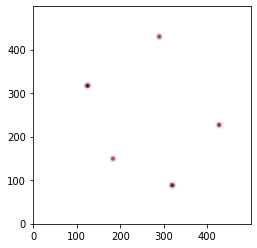

In [39]:
positions = np.transpose((sources_stars['xcentroid'], sources_stars['ycentroid']))
apertures = CircularAperture(positions, r=3.0)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(stars_image, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')
apertures.plot(color='red', lw=1.5, alpha=0.5)

In [40]:
from photutils.aperture import aperture_photometry

photo_table = aperture_photometry(stars_image, apertures)
photo_table

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,319.1005319265878,88.35552525812568,276.7676360194589
2,183.1233049597628,149.29441941132228,118.91925503387498
3,426.7249788384287,226.7396439565466,176.5637360135529
4,124.69754089860425,316.89691089806433,319.208388609508
5,289.3196626593726,429.55475605595046,150.68298850764864
